In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Data
df = pd.read_csv("data/merged_features.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Date,Ticker,Close,High,Low,Open,Volume,Return,RollingVol,RSI,SMA_20,SMA_50,Volume_Z,VIX,Direction,VolSpike
0,2015-03-16,AAPL,27.809700,27.809700,27.346763,27.571554,143497200,0.011004,0.012886,51.177508,28.424203,26.586998,-1.322438,15.61,1,0
1,2015-03-16,AMZN,18.667500,18.697001,18.336000,18.518999,47082000,0.007475,0.014070,53.483548,18.935100,17.347630,-0.584754,15.61,1,0
2,2015-03-16,DAL,40.501942,40.791494,40.326456,40.493169,8517000,0.014506,0.018240,52.787405,39.891689,40.751535,-1.195312,15.61,1,0
3,2015-03-16,GOOGL,27.889645,27.994421,27.377178,27.655757,36856000,0.015624,0.012757,54.684637,27.735530,26.665128,-0.254974,15.61,1,0
4,2015-03-16,JPM,46.242439,46.294775,45.793848,45.980761,15182900,0.013935,0.013635,59.083914,45.507863,44.026835,-0.167447,15.61,1,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34538 entries, 0 to 34537
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        34538 non-null  datetime64[ns]
 1   Ticker      34538 non-null  object        
 2   Close       34538 non-null  float64       
 3   High        34538 non-null  float64       
 4   Low         34538 non-null  float64       
 5   Open        34538 non-null  float64       
 6   Volume      34538 non-null  int64         
 7   Return      34538 non-null  float64       
 8   RollingVol  34538 non-null  float64       
 9   RSI         34538 non-null  float64       
 10  SMA_20      34538 non-null  float64       
 11  SMA_50      34538 non-null  float64       
 12  Volume_Z    34538 non-null  float64       
 13  VIX         34538 non-null  float64       
 14  Direction   34538 non-null  int64         
 15  VolSpike    34538 non-null  int64         
dtypes: datetime64[ns](1), 

,Date,Close,High,Low,Open,Volume,Return,RollingVol,RSI,SMA_20,SMA_50,Volume_Z,VIX,Direction,VolSpike
count,34538,34538.000000,34538.000000,34538.000000,34538.000000,3.453800e+04,34538.000000,34538.000000,34538.000000,34538.000000,34538.000000,34538.000000,34538.000000,34538.000000,34538.000000
mean,2020-02-05 07:46:22.813133056,114.846591,116.083034,113.567473,114.841968,6.608480e+07,0.000981,0.017937,53.784581,114.126673,113.015799,-0.001570,18.293133,0.526087,0.245990
min,2015-03-16 00:00:00,0.467299,0.472623,0.461975,0.465847,1.912000e+05,-0.302902,0.002029,14.600090,0.478552,0.500685,-2.935436,9.140000,0.000000,0.000000
25%,2017-08-23 00:00:00,41.817060,42.348079,41.264956,41.812694,6.625600e+06,-0.008051,0.009876,45.055888,41.575125,41.580400,-0.706536,13.300000,0.000000,0.000000
50%,2020-02-06 00:00:00,67.478889,68.121034,66.832760,67.476176,1.909586e+07,0.000851,0.014533,53.843275,67.280209,65.875710,-0.255328,16.299999,1.000000,0.000000
75%,2022-07-20 00:00:00,153.032246,154.541107,150.991591,152.904572,5.747228e+07,0.009970,0.021948,62.570347,151.447487,149.663518,0.465357,21.420000,1.000000,0.000000
max,2024-12-31 00:00:00,597.794495,602.015780,594.633413,598.796343,3.692928e+09,0.298067,0.186577,94.197983,583.876056,563.340719,4.232049,82.690002,1.000000,1.000000
std,NaN,111.863019,112.979564,110.727175,111.875188,1.398347e+08,0.021911,0.012693,12.392756,111.203454,110.196208,1.055984,7.342981,0.499326,0.430679


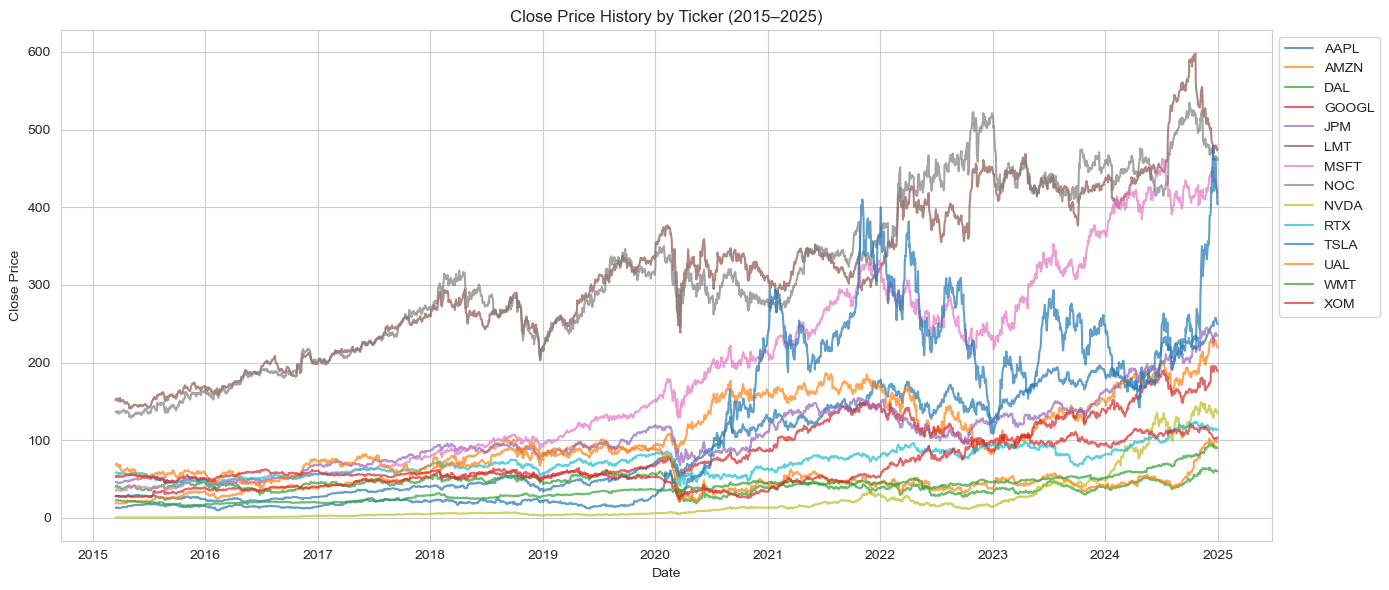

In [4]:
plt.figure(figsize=(14,6))
for t in df['Ticker'].unique():
    subset = df[df['Ticker'] == t]
    plt.plot(subset['Date'], subset['Close'], alpha=0.7, label=t)

plt.title("Close Price History by Ticker (2015–2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

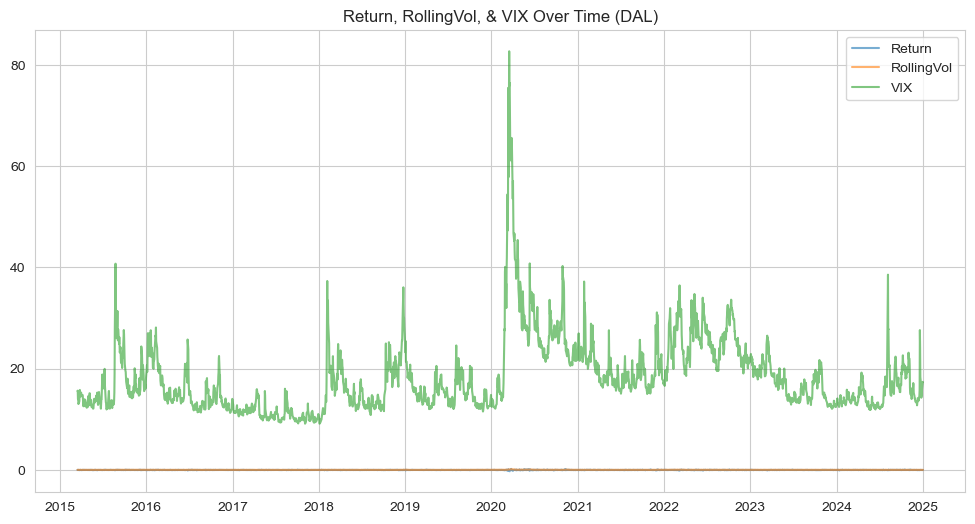

In [5]:
sample = df[df['Ticker']=='DAL']  # Rep Ticker

plt.plot(sample['Date'], sample['Return'], label="Return", alpha=0.6)
plt.plot(sample['Date'], sample['RollingVol'], label="RollingVol", alpha=0.6)
plt.plot(sample['Date'], sample['VIX'], label="VIX", alpha=0.6)

plt.title("Return, RollingVol, & VIX Over Time (DAL)")
plt.legend()
plt.show()

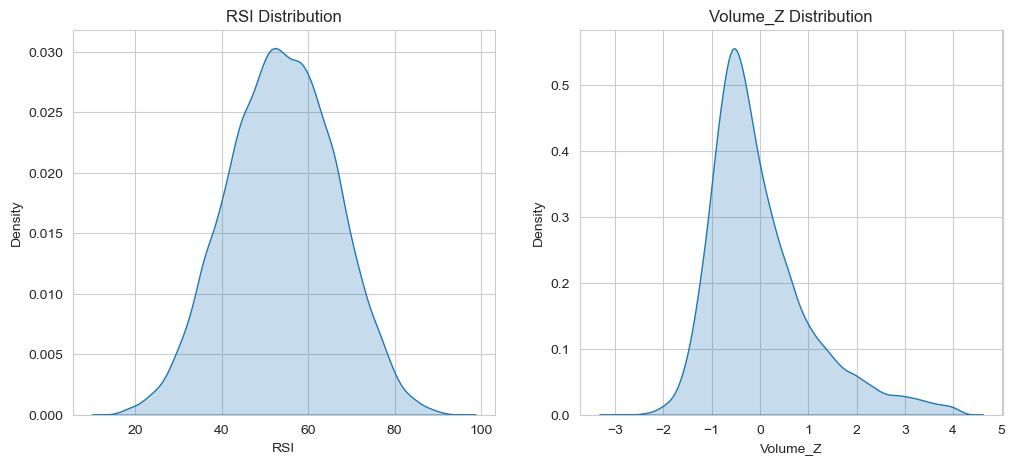

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(df['RSI'], ax=ax[0], fill=True)
ax[0].set_title("RSI Distribution")

sns.kdeplot(df['Volume_Z'], ax=ax[1], fill=True)
ax[1].set_title("Volume_Z Distribution")

plt.show()

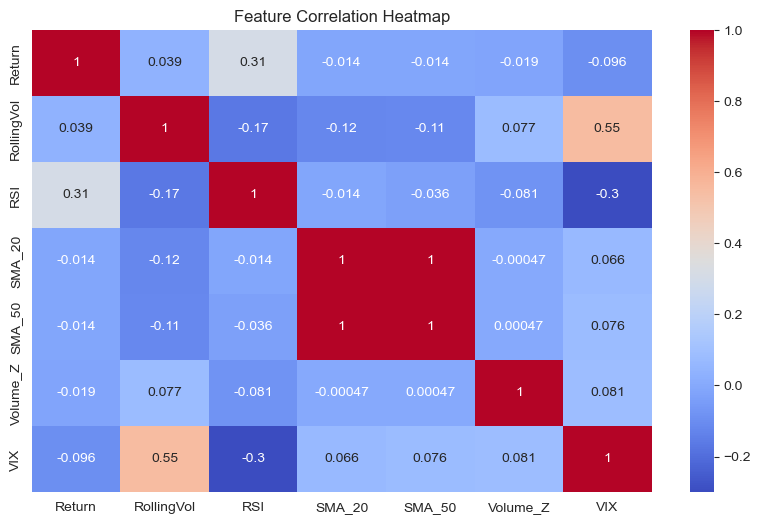

In [7]:
numeric_cols = ['Return','RollingVol','RSI','SMA_20','SMA_50','Volume_Z','VIX']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

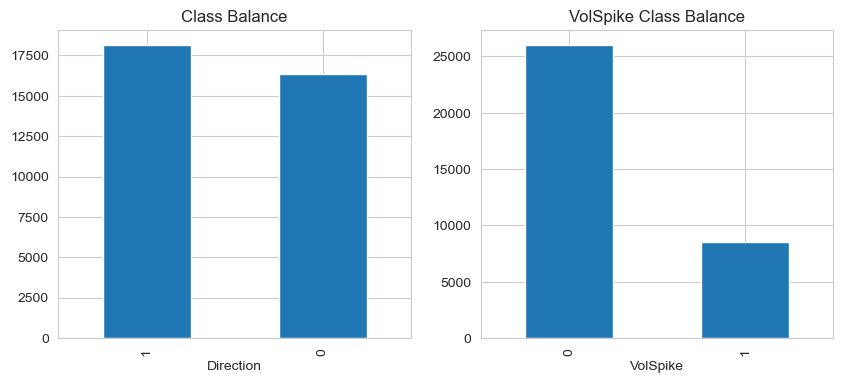

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

df['Direction'].value_counts().plot(kind='bar', ax=ax[0], title='Class Balance')
df['VolSpike'].value_counts().plot(kind='bar', ax=ax[1], title='VolSpike Class Balance')

plt.show()

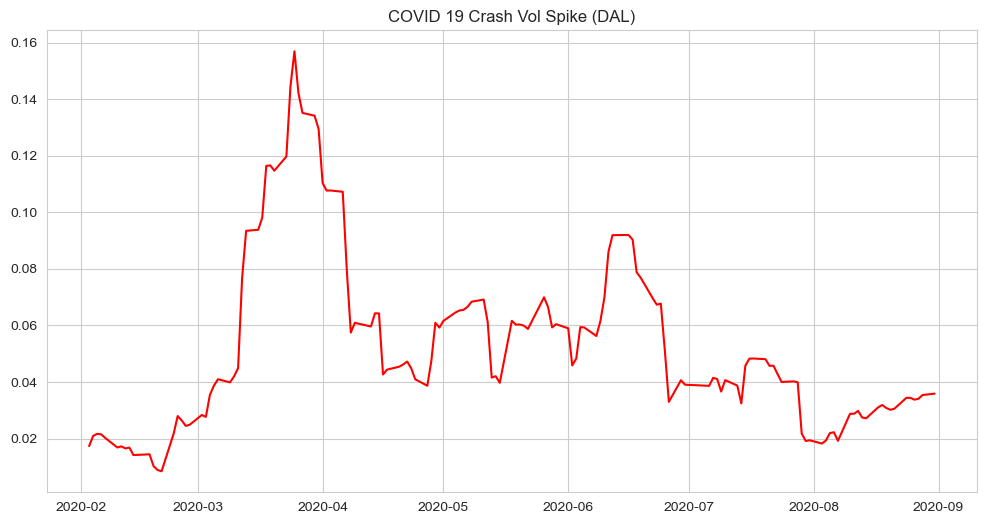

In [9]:
covid = df[(df['Date'] > '2020-02-01') & (df['Date'] < '2020-09-01') & (df['Ticker']=='DAL')]
plt.plot(covid['Date'], covid['RollingVol'], color="red")
plt.title("COVID 19 Crash Vol Spike (DAL)")
plt.show()

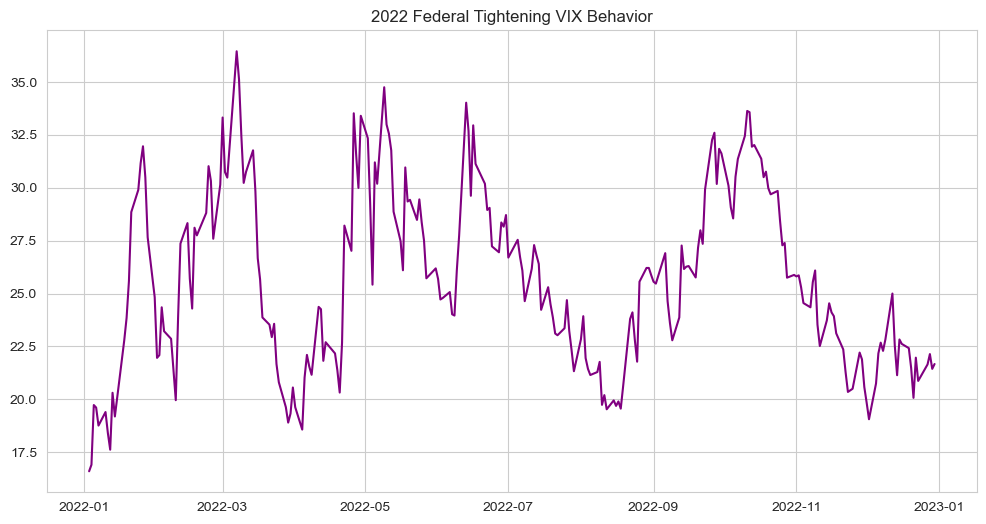

In [10]:
taper = df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-12-31') & (df['Ticker']=='DAL')]
plt.plot(taper['Date'], taper['VIX'], color="purple")
plt.title("2022 Federal Tightening VIX Behavior")
plt.show()